# 이해하기

범주형 피처 23개를 활용해 해당 데이터가 타깃값 1에 속할 확률 예측 

- 특이점  
  첫째, 인위적으로 만든 데이터를 제공  
  둘째, 피처와 타깃값의 의미를 알 수 없음  
  셋째, 모두 범주형  
  이진 변수(bin_으로 시작), 순서형 데이터(ord_으로 시작), 명목형 데이터(nom_으로 시작), 날짜 데이터(day, month) 등 
  다양한 데이터가 있고, ord_3, ord_4, ord_5는 알파벳 순으로 고윳값 순서를 매겼음

타깃값이 0과1로 이진 분류 문제

# EDA

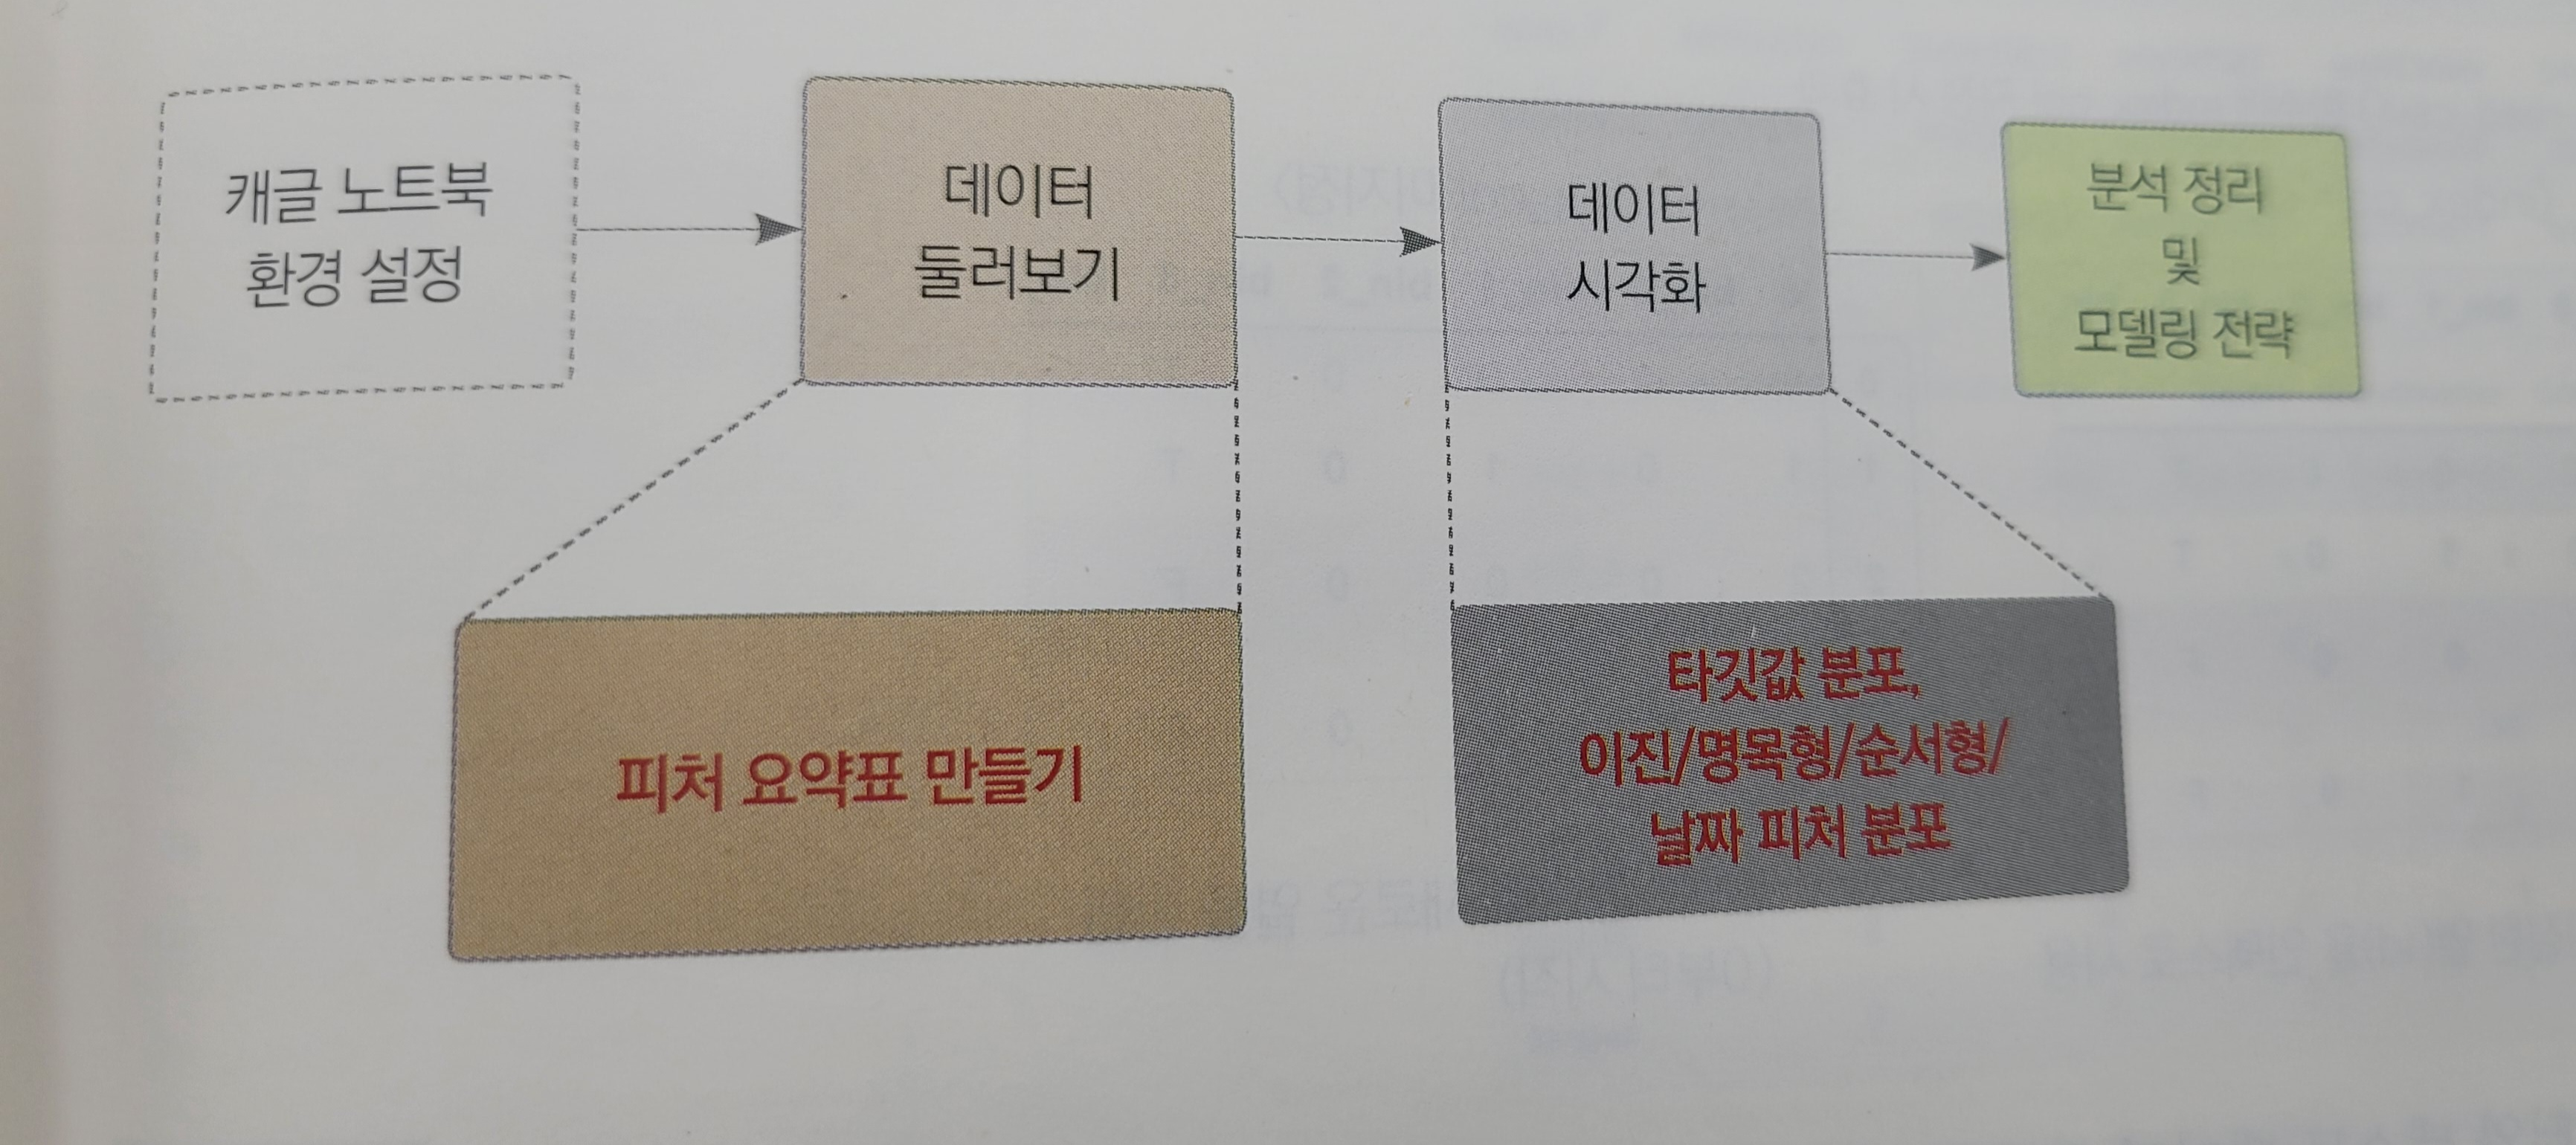

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_csv('train.csv',index_col='id')#지정한 열이 인덱스
test=pd.read_csv('test.csv',index_col='id')
submission=pd.read_csv('sample_submission.csv',index_col='id')

In [3]:
train.shape

(300000, 24)

In [4]:
test.shape

(200000, 23)

In [5]:
train.head().T

id                0            1          2            3            4
bin_0             0            0          0            0            0
bin_1             0            1          0            1            0
bin_2             0            0          0            0            0
bin_3             T            T          F            F            F
bin_4             Y            Y          Y            Y            N
nom_0         Green        Green       Blue          Red          Red
nom_1      Triangle    Trapezoid  Trapezoid    Trapezoid    Trapezoid
nom_2         Snake      Hamster       Lion        Snake         Lion
nom_3       Finland       Russia     Russia       Canada       Canada
nom_4       Bassoon        Piano   Theremin         Oboe         Oboe
nom_5     50f116bcf    b3b4d25d0  3263bdce5    f12246592    5b0f5acd5
nom_6     3ac1b8814    fbcb50fc1  0922e3cb8    50d7ad46a    1fe17a1fd
nom_7     68f6ad3e9    3b6dd5612  a6a36f527    ec69236eb    04ddac2be
nom_8     c389000ab    4cd920251  de9c9f684    4ade6ab69    cb43ab175
nom_9     2f4cb3d51    f83c56c21  ae6800dd0    8270f0d71    b164b72a7
ord_0             2            1          1            1            1
ord_1   Grandmaster  Grandmaster     Expert  Grandmaster  Grandmaster
ord_2          Cold          Hot   Lava Hot  Boiling Hot     Freezing
ord_3             h            a          h            i            a
ord_4             D            A          R            D            R
ord_5            kr           bF         Jc           kW           qP
day               2            7          7            2            7
month             2            8          2            1            8
target            0            0          0            1            0

In [6]:
submission.head()

target
id            
300000     0.5
300001     0.5
300002     0.5
300003     0.5
300004     0.5

In [7]:
test.head().T

id        300000     300001     300002       300003       300004
bin_0          0          0          1            0            0
bin_1          0          0          0            0            1
bin_2          1          0          1            1            1
bin_3          T          T          F            T            F
bin_4          Y          N          Y            Y            N
nom_0       Blue        Red       Blue          Red          Red
nom_1   Triangle     Square     Square         Star    Trapezoid
nom_2    Axolotl       Lion        Dog          Cat          Dog
nom_3    Finland     Canada      China        China        China
nom_4      Piano      Piano      Piano        Piano        Piano
nom_5  0870b0a5d  a5c276589  568550f04    c5725677e    e70a6270d
nom_6  9ceb19dd6  1ad744242  1fe17a1fd    a6542cec0    97b6a3518
nom_7  530f8ecc3  12e6161c9  27d6df03f    30c63bd0c    a42386065
nom_8  9d117320c  46ae3059c  b759e21f0    0b6ec68ff    f91f3b1ee
nom_9  3c49b42b8  285771075  6f323c53f    b5de3dcc4    967cfa9c9
ord_0          2          1          2            1            3
ord_1     Novice     Master     Expert  Contributor  Grandmaster
ord_2       Warm   Lava Hot   Freezing     Lava Hot     Lava Hot
ord_3          j          l          a            b            l
ord_4          P          A          G            Q            W
ord_5         be         RP         tP           ke           qK
day            5          7          1            2            4
month         11          5         12            3           11

##  요약본 만들기

In [8]:
pd.DataFrame(train.dtypes, columns = ['데이터 타입']).reset_index()

index  데이터 타입
0    bin_0   int64
1    bin_1   int64
2    bin_2   int64
3    bin_3  object
4    bin_4  object
5    nom_0  object
6    nom_1  object
7    nom_2  object
8    nom_3  object
9    nom_4  object
10   nom_5  object
11   nom_6  object
12   nom_7  object
13   nom_8  object
14   nom_9  object
15   ord_0   int64
16   ord_1  object
17   ord_2  object
18   ord_3  object
19   ord_4  object
20   ord_5  object
21     day   int64
22   month   int64
23  target   int64

In [9]:
def resumetable(df) :
    print(f'데이터셋 형상 : {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns = ['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns = {'index' : '피처'})
    summary['결측값 수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['1번째 값'] = df.loc[0].values
    summary['2번째 값'] = df.loc[1].values
    summary['3번째 값'] = df.loc[2].values
    
    return summary

In [10]:
resumetable(train)

데이터셋 형상 : (300000, 24)


피처  데이터 타입  결측값 수  고윳값 개수        1번째 값        2번째 값      3번째 값
0    bin_0   int64      0       2            0            0          0
1    bin_1   int64      0       2            0            1          0
2    bin_2   int64      0       2            0            0          0
3    bin_3  object      0       2            T            T          F
4    bin_4  object      0       2            Y            Y          Y
5    nom_0  object      0       3        Green        Green       Blue
6    nom_1  object      0       6     Triangle    Trapezoid  Trapezoid
7    nom_2  object      0       6        Snake      Hamster       Lion
8    nom_3  object      0       6      Finland       Russia     Russia
9    nom_4  object      0       4      Bassoon        Piano   Theremin
10   nom_5  object      0     222    50f116bcf    b3b4d25d0  3263bdce5
11   nom_6  object      0     522    3ac1b8814    fbcb50fc1  0922e3cb8
12   nom_7  object      0    1220    68f6ad3e9    3b6dd5612  a6a36f527
13   nom_8  object      0    2215    c389000ab    4cd920251  de9c9f684
14   nom_9  object      0   11981    2f4cb3d51    f83c56c21  ae6800dd0
15   ord_0   int64      0       3            2            1          1
16   ord_1  object      0       5  Grandmaster  Grandmaster     Expert
17   ord_2  object      0       6         Cold          Hot   Lava Hot
18   ord_3  object      0      15            h            a          h
19   ord_4  object      0      26            D            A          R
20   ord_5  object      0     192           kr           bF         Jc
21     day   int64      0       7            2            7          7
22   month   int64      0      12            2            8          2
23  target   int64      0       2            0            0          0

- 이진 피처 : 머신러닝은 숫자만 인식해서 bin_3(T/F), bin_4(Y/N) 을 0, 1로 인코딩  
- 명목형 피처 : object 타입이고, nom_5~nom_9는 의미를 파악하기 어려운 값들이 입력
- 순서형 피처 : 순서가 중요, 순서에 유의하며 인코딩 해야함

### 순서를 파악하기 위해 순서형 피처의 고유값 출력

In [11]:
for i in range(3) : 
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값 : {train[feature].unique()}')

ord_0 고윳값 : [2 1 3]
ord_1 고윳값 : ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 고윳값 : ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']


- ord_0은 숫자이기 때문에 숫자 크기에 맞춰 순서를 맞추면 됨  
- ord_1은 캐글 등급이기 때문에 Novice, Contributor, Expert, Master, Grandmaster 순으로 하면 됨  
- ord_2는 춥고 더운 정도이기 때문에 Freezing, Cold, Warm, Hot, Boiling Hot, Lava Hot 순으로 하면 됨

In [12]:
for i in range(3, 6) : 
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값 : {train[feature].unique()}')

ord_3 고윳값 : ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
ord_4 고윳값 : ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
ord_5 고윳값 : ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' 'tM' 'NV'
 'ih' 'IK' 'Ob' 'RP' 'dN' 'us' 'dZ' 'yN' 'Nf' 'QM' 'jV' 'sY' 'wu' 'SB'
 'UO' 'Mx' 'JX' 'Ry' 'Uk' 'uJ' 'LE' 'ps' 'kE' 'MO' 'kw' 'yY' 'zU' 'bJ'
 'Kf' 'ck' 'mb

- 알파벳 순으로 정렬

### 일, 월, 타깃값 확인

In [13]:
for feature in ['day' ,'month', 'target'] : 
    print(f'{feature} 고윳값 : {train[feature].unique()}')

day 고윳값 : [2 7 5 4 3 1 6]
month 고윳값 : [ 2  8  1  4 10  3  7  9 12 11  5  6]
target 고윳값 : [0 1]


# 시각화

In [14]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## 타깃값 분포

사각형 높이: 208236
사각형 너비: 0.8
사각형 왼쪽 테두리의 x축 위치: -0.4


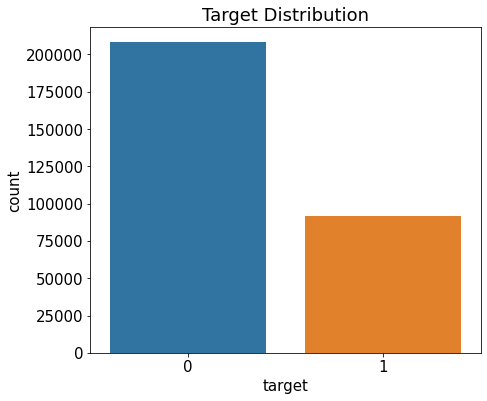

In [19]:
mpl.rc('font',size=15)
plt.figure(figsize=(7,6))
ax=sns.countplot(x='target',data=train)
ax.set_title('Target Distribution')
rectangle=ax.patches[0]
print('사각형 높이:',rectangle.get_height())
print('사각형 너비:',rectangle.get_width())
print('사각형 왼쪽 테두리의 x축 위치:',rectangle.get_x())

카운트플롯은 범주형 데이터의 개수를 확인할 때 주로 사용

이제는 막대 바로 위에 표시하려고 함

In [21]:
print('텍스트 위치의 x좌표:',rectangle.get_x()+rectangle.get_width()/2.0)
print('텍스트 위치의 y좌표:',rectangle.get_height()+len(train)*0.001)

텍스트 위치의 x좌표: 0.0
텍스트 위치의 y좌표: 208536.0


In [24]:
def write_percent(ax,total_size):
    '''도형 객체를 순회하며 막대 상단에 타깃값 비율 표시'''
    for patch in ax.patches:
        height=patch.get_height()
        width=patch.get_width()
        left_coord=patch.get_x()
        percent=height/total_size*100
        
        ax.text(x=left_coord+width/2.0,
               y=height+total_size*0.001,
               s=f'{percent:1.1f}%',
               ha='center')

Text(0.5, 1.0, 'Target Distribution')

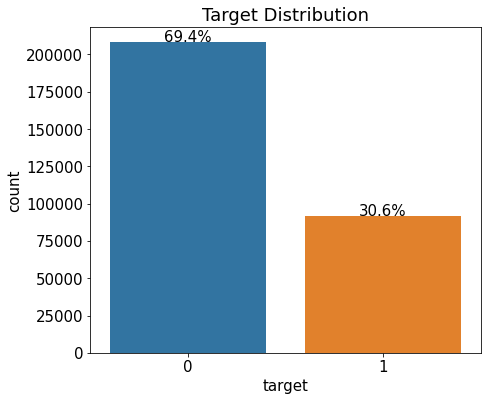

In [25]:
plt.figure(figsize=(7,6))
ax=sns.countplot(x='target',data=train)
write_percent(ax,len(train))
ax.set_title('Target Distribution')